## Load pustaka

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm

import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random

Using TensorFlow backend.


## Load data

In [ ]:
_URL = 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'

path_to_zip = tf.keras.utils.get_file('rockpaperscissors.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'rockpaperscissors')

## Pisah kan data menjadi folder train dan validasi dengan rasio train 60% dan validasi 40%

In [ ]:
root_dir = PATH
classes_dir = ['/paper', '/rock', '/scissors']

train_ratio = 0.6
val_ratio = 0.4

total_images = 0
total_train = 0
total_val = 0

for cls in classes_dir:
  shutil.rmtree(root_dir +'/train' + cls, ignore_errors=True)
  shutil.rmtree(root_dir +'/val' + cls, ignore_errors=True)

  os.makedirs(root_dir +'/train' + cls)
  os.makedirs(root_dir +'/val' + cls)
  src = root_dir + cls
  allFileNames = os.listdir(src)
  np.random.shuffle(allFileNames)
  
  train_FileNames, val_FileNames = np.split(np.array(allFileNames), 
                                   [int(train_ratio * len(allFileNames))])

  train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

  total_images += len(allFileNames)
  total_train +=  len(train_FileNames)
  total_val += len(val_FileNames)
  
  for name in train_FileNames:
    shutil.copy(name, root_dir +'/train' + cls)

  for name in val_FileNames:
    shutil.copy(name, root_dir +'/val' + cls)

print('Total images: ', total_images)
print('Training: ', total_train)
print('Validation: ', total_val)

Total images:  2188
Training:  1312
Validation:  876


In [ ]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')

In [ ]:
os.listdir(train_dir)

['paper', 'scissors', 'rock']

In [ ]:
os.listdir(validation_dir)

['paper', 'scissors', 'rock']

## Load image data generator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

## Atur flow from directory
gunakan mode kelas categorical untuk multi kelas

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(150, 150),  
        batch_size=4,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='sparse')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


Kelas dan label mumerik nya

In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

## Bangun model nya
di tambahin dropout dan batch normalization

ref:
https://stackabuse.com/image-recognition-in-python-with-tensorflow-and-keras/
https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

biar beda gunakan optimizer adadelta dan loss categorical cross entropy

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.003, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 73, 73, 64)       

## Jalankan trainingnya

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=10, 
      epochs=50,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

## Coba hasilnya

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline  

Saving xPDNBvgWZrdijzTm.png to xPDNBvgWZrdijzTm.png
[[0. 1. 0.]]
1
rock


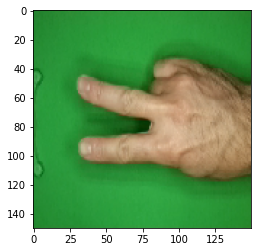

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  prediksi = model.predict(images, batch_size=10)
  print(prediksi)

  kelas_prediksi = np.argmax(prediksi[0])
  print(kelas_prediksi)

  if kelas_prediksi == 0:
    print("paper")
  if kelas_prediksi == 1:
    print("rock")
  if kelas_prediksi == 2:
    print("scissor")